Loading the dataset

In [3]:
#importing libraries
import pandas as  pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf # regression modeling
from sklearn.linear_model import LinearRegression

#Reading the excel
file='OJ_data.xlsx'
data = pd.read_excel(io=file,header=0,sheet_name='Sheet1')
data.head(10)

,week,sales1,sales2,sales3,sales4,sales5,price1,price2,price3,price4,...,feat1,feat2,feat3,feat4,feat5,grmar1,grmar2,grmar3,grmar4,grmar5
0,40,6528,8448,47040,4224,2432,0.057188,0.060312,0.029531,0.046719,...,0.0,0.0,1.0,0.0,1,0.344357,0.295700,0.107935,0.307700,0.0101
1,43,6016,8352,3008,5696,2112,0.057188,0.060312,0.044375,0.046719,...,0.0,0.0,1.0,0.0,0,0.342101,0.295700,0.416802,0.365920,0.4281
2,44,6272,7776,2816,36160,896,0.057188,0.060312,0.044375,0.040469,...,0.0,0.0,0.0,1.0,0,0.319928,0.295700,0.372591,0.334818,0.4281
3,45,6848,7968,28352,3200,1152,0.057188,0.060312,0.037344,0.046719,...,0.0,0.0,0.0,0.0,0,0.264671,0.295700,0.257612,0.404416,0.3687
4,46,7424,7296,3712,11904,3072,0.057188,0.060312,0.044375,0.046719,...,0.0,0.0,0.0,0.0,0,0.260983,0.295700,0.363762,0.412581,0.3747
5,47,6848,7200,11136,21376,4672,0.057188,0.060312,0.044375,0.037344,...,0.0,0.0,0.0,1.0,1,0.259800,0.295700,0.365395,0.207690,0.2550
6,48,7488,7968,35904,3648,1920,0.057188,0.060312,0.037344,0.046719,...,0.0,0.0,1.0,0.0,0,0.259300,0.295700,0.221557,0.344168,0.2569
7,49,6336,7200,2368,46848,896,0.057188,0.060312,0.037344,0.031094,...,0.0,0.0,0.0,1.0,0,0.259000,0.338580,0.246486,0.013690,0.2478
8,50,6208,11712,45824,3328,1152,0.057188,0.060312,0.031094,0.046719,...,0.0,1.0,1.0,0.0,0,0.259000,0.382092,0.151579,0.351496,0.2512
9,51,6400,10368,3008,4096,26432,0.057188,0.060312,0.044375,0.046719,...,0.0,0.0,0.0,0.0,1,0.259000,0.373050,0.395757,0.352683,0.2000


Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   week    116 non-null    int64  
 1   sales1  116 non-null    int64  
 2   sales2  116 non-null    int64  
 3   sales3  116 non-null    int64  
 4   sales4  116 non-null    int64  
 5   sales5  116 non-null    int64  
 6   price1  116 non-null    float64
 7   price2  116 non-null    float64
 8   price3  116 non-null    float64
 9   price4  116 non-null    float64
 10  price5  116 non-null    float64
 11  disp1   116 non-null    float64
 12  disp2   116 non-null    float64
 13  disp3   116 non-null    float64
 14  disp4   116 non-null    float64
 15  disp5   116 non-null    int64  
 16  feat1   116 non-null    float64
 17  feat2   116 non-null    float64
 18  feat3   116 non-null    float64
 19  feat4   116 non-null    float64
 20  feat5   116 non-null    int64  
 21  grmar1  116 non-null    float64
 22  gr

In [5]:
data.describe()

,week,sales1,sales2,sales3,sales4,sales5,price1,price2,price3,price4,...,feat1,feat2,feat3,feat4,feat5,grmar1,grmar2,grmar3,grmar4,grmar5
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,...,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,101.844828,18879.448276,11763.310345,14898.206897,18481.103448,15358.896552,0.045321,0.050033,0.035966,0.035440,...,0.165062,0.129114,0.332286,0.273003,0.250000,0.279329,0.285577,0.294565,0.253375,0.292908
std,34.543383,20103.609961,4416.207439,24515.783919,27366.165934,18560.147732,0.008683,0.005744,0.006302,0.006101,...,0.367102,0.336494,0.465997,0.442945,0.434891,0.122663,0.062690,0.113905,0.110108,0.141708
min,40.000000,4608.000000,6048.000000,704.000000,3072.000000,896.000000,0.026406,0.037083,0.023281,0.020156,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.015661,0.048026,0.000790,0.005774,0.007700
25%,73.750000,7600.000000,8736.000000,2096.000000,5184.000000,3504.000000,0.038906,0.047813,0.031094,0.031094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.221546,0.274808,0.221347,0.173191,0.206900
50%,102.500000,10880.000000,10704.000000,3648.000000,7872.000000,7264.000000,0.046719,0.049479,0.036719,0.035312,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.290407,0.296200,0.330478,0.261976,0.292200
75%,131.250000,17040.000000,12984.000000,13088.000000,19088.000000,18208.000000,0.052969,0.052917,0.040321,0.039072,...,0.000000,0.000000,1.000000,1.000000,0.250000,0.367215,0.315421,0.377743,0.334891,0.408800
max,160.000000,98624.000000,29952.000000,171264.000000,192128.000000,83008.000000,0.057188,0.060312,0.045156,0.046719,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.486159,0.418158,0.491373,0.449935,0.536500


In [6]:
#Looking at each product individually

product1= data.loc[:,['week','sales1','price1','disp1','feat1','grmar1']]
product1.head(5)

,week,sales1,price1,disp1,feat1,grmar1
0,40,6528,0.057188,0.284314,0.0,0.344357
1,43,6016,0.057188,0.000000,0.0,0.342101
2,44,6272,0.057188,0.000000,0.0,0.319928
3,45,6848,0.057188,0.000000,0.0,0.264671
4,46,7424,0.057188,0.000000,0.0,0.260983


In [7]:
product2= data.loc[:,['week','sales2','price2','disp2','feat2','grmar2']]
product2.head(5)

,week,sales2,price2,disp2,feat2,grmar2
0,40,8448,0.060312,0.0,0.0,0.2957
1,43,8352,0.060312,0.0,0.0,0.2957
2,44,7776,0.060312,0.0,0.0,0.2957
3,45,7968,0.060312,0.0,0.0,0.2957
4,46,7296,0.060312,0.0,0.0,0.2957


In [8]:
product3= data.loc[:,['week','sales3','price3','disp3','feat3','grmar3']]
product3.head(5)

,week,sales3,price3,disp3,feat3,grmar3
0,40,47040,0.029531,0.496599,1.0,0.107935
1,43,3008,0.044375,0.000000,1.0,0.416802
2,44,2816,0.044375,0.000000,0.0,0.372591
3,45,28352,0.037344,0.449210,0.0,0.257612
4,46,3712,0.044375,0.000000,0.0,0.363762


In [9]:
product4= data.loc[:,['week','sales4','price4','disp4','feat4','grmar4']]
product4.head(5)

,week,sales4,price4,disp4,feat4,grmar4
0,40,4224,0.046719,0.0,0.0,0.307700
1,43,5696,0.046719,0.0,0.0,0.365920
2,44,36160,0.040469,0.0,1.0,0.334818
3,45,3200,0.046719,0.0,0.0,0.404416
4,46,11904,0.046719,0.0,0.0,0.412581


In [10]:
product5= data.loc[:,['week','sales5','price5','disp5','feat5','grmar5']]
product5.head(5)

,week,sales5,price5,disp5,feat5,grmar5
0,40,2432,0.024844,0,1,0.0101
1,43,2112,0.038906,0,0,0.4281
2,44,896,0.038906,0,0,0.4281
3,45,1152,0.038906,0,0,0.3687
4,46,3072,0.038906,0,0,0.3747


In [11]:
#Products profit function

data['sales_revenue1'] = data['sales1']*64*data['price1']
data['sales_revenue2'] = data['sales2']*96*data['price2']
data['sales_revenue3'] = data['sales3']*64*data['price3']
data['sales_revenue4'] = data['sales4']*64*data['price4']
data['sales_revenue5'] = data['sales5']*64*data['price5']

data.head(10)

,week,sales1,sales2,sales3,sales4,sales5,price1,price2,price3,price4,...,grmar1,grmar2,grmar3,grmar4,grmar5,sales_revenue1,sales_revenue2,sales_revenue3,sales_revenue4,sales_revenue5
0,40,6528,8448,47040,4224,2432,0.057188,0.060312,0.029531,0.046719,...,0.344357,0.295700,0.107935,0.307700,0.0101,23892.48,48913.92,88905.60,12629.76,3866.88
1,43,6016,8352,3008,5696,2112,0.057188,0.060312,0.044375,0.046719,...,0.342101,0.295700,0.416802,0.365920,0.4281,22018.56,48358.08,8542.72,17031.04,5258.88
2,44,6272,7776,2816,36160,896,0.057188,0.060312,0.044375,0.040469,...,0.319928,0.295700,0.372591,0.334818,0.4281,22955.52,45023.04,7997.44,93654.40,2231.04
3,45,6848,7968,28352,3200,1152,0.057188,0.060312,0.037344,0.046719,...,0.264671,0.295700,0.257612,0.404416,0.3687,25063.68,46134.72,67761.28,9568.00,2868.48
4,46,7424,7296,3712,11904,3072,0.057188,0.060312,0.044375,0.046719,...,0.260983,0.295700,0.363762,0.412581,0.3747,27171.84,42243.84,10542.08,35592.96,7649.28
5,47,6848,7200,11136,21376,4672,0.057188,0.060312,0.044375,0.037344,...,0.259800,0.295700,0.365395,0.207690,0.2550,25063.68,41688.00,31626.24,51088.64,9764.48
6,48,7488,7968,35904,3648,1920,0.057188,0.060312,0.037344,0.046719,...,0.259300,0.295700,0.221557,0.344168,0.2569,27406.08,46134.72,85810.56,10907.52,4012.80
7,49,6336,7200,2368,46848,896,0.057188,0.060312,0.037344,0.031094,...,0.259000,0.338580,0.246486,0.013690,0.2478,23189.76,41688.00,5659.52,93227.52,1872.64
8,50,6208,11712,45824,3328,1152,0.057188,0.060312,0.031094,0.046719,...,0.259000,0.382092,0.151579,0.351496,0.2512,22721.28,67812.48,91189.76,9950.72,2407.68
9,51,6400,10368,3008,4096,26432,0.057188,0.060312,0.044375,0.046719,...,0.259000,0.373050,0.395757,0.352683,0.2000,23424.00,60030.72,8542.72,12247.04,49956.48


<AxesSubplot:title={'center':'Maximum achieved sales per product'}>

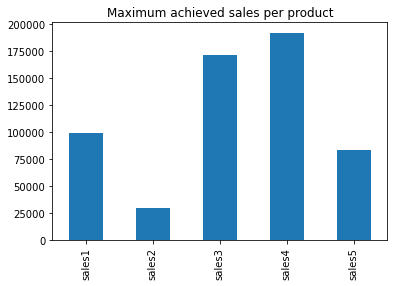

In [12]:
max_sales = data.iloc[:,1:6].max()
max_sales.plot(kind='bar', title = 'Maximum achieved sales per product')

In [13]:
data['week'].value_counts()

160    1
87     1
75     1
76     1
77     1
      ..
126    1
127    1
128    1
129    1
40     1
Name: week, Length: 116, dtype: int64

In [14]:
#Checking if there are any nulls
data.isnull().any(axis=0)

week              False
sales1            False
sales2            False
sales3            False
sales4            False
sales5            False
price1            False
price2            False
price3            False
price4            False
price5            False
disp1             False
disp2             False
disp3             False
disp4             False
disp5             False
feat1             False
feat2             False
feat3             False
feat4             False
feat5             False
grmar1            False
grmar2            False
grmar3            False
grmar4            False
grmar5            False
sales_revenue1    False
sales_revenue2    False
sales_revenue3    False
sales_revenue4    False
sales_revenue5    False
dtype: bool

<AxesSubplot:xlabel='feat1', ylabel='sales_revenue1'>

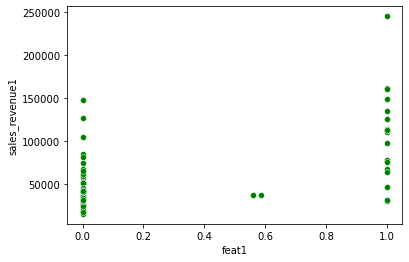

In [15]:
# Checking the errors in the binary variables.

sns.scatterplot(x = data['feat1'],
                y = data['sales_revenue1'],
                color = 'g')

<AxesSubplot:xlabel='sales1', ylabel='Count'>

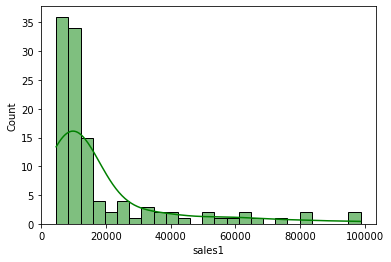

In [16]:
#Checking if the distribution is normal

sns.histplot(x = data['sales1'],
             kde=True,
                color = 'g')

In [17]:
#Transforming variables into log to aim normal distributions and percentual change

#sales revenue LOG
data['log_sales_revenue1']= np.log(data['sales_revenue1'])
data['log_sales_revenue2']= np.log(data['sales_revenue2'])
data['log_sales_revenue3']= np.log(data['sales_revenue3'])
data['log_sales_revenue4']= np.log(data['sales_revenue4'])
data['log_sales_revenue5']= np.log(data['sales_revenue5'])

#Sales LOG
data['log_sales1']= np.log(data['sales1'])
data['log_sales2']= np.log(data['sales2'])
data['log_sales3']= np.log(data['sales3'])
data['log_sales4']= np.log(data['sales4'])
data['log_sales5']= np.log(data['sales5'])

#Price LOG
data['log_price1']= np.log(data['price1'])
data['log_price2']= np.log(data['price2'])
data['log_price3']= np.log(data['price3'])
data['log_price4']= np.log(data['price4'])
data['log_price5']= np.log(data['price5'])

#GRMAR LOG

data['log_grmar1']= np.log(data['grmar1'])
data['log_grmar2']= np.log(data['grmar2'])
data['log_grmar3']= np.log(data['grmar3'])
data['log_grmar4']= np.log(data['grmar4'])
data['log_grmar5']= np.log(data['grmar5'])

<AxesSubplot:xlabel='log_sales_revenue1', ylabel='Count'>

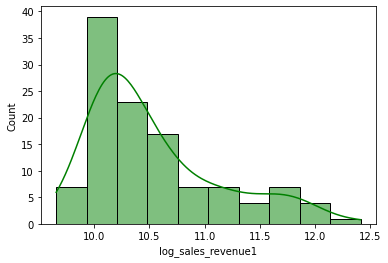

In [18]:
sns.histplot(x = data['log_sales_revenue1'],
             kde=True,
                color = 'g')

<AxesSubplot:xlabel='log_sales_revenue2', ylabel='Count'>

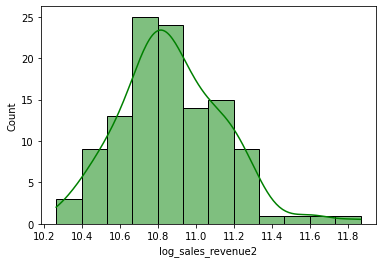

In [19]:
sns.histplot(x = data['log_sales_revenue2'],
             kde=True,
                color = 'g')

<AxesSubplot:xlabel='log_sales_revenue3', ylabel='Count'>

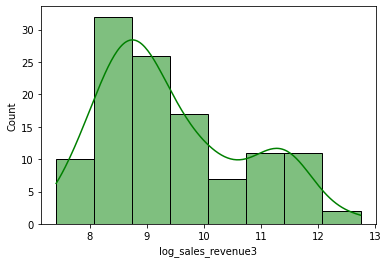

In [20]:
sns.histplot(x = data['log_sales_revenue3'],
             kde=True,
                color = 'g')

<AxesSubplot:xlabel='log_sales_revenue4', ylabel='Count'>

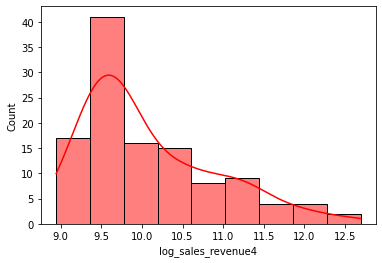

In [21]:
sns.histplot(x = data['log_sales_revenue4'],
             kde=True,
                color = 'r')

<AxesSubplot:xlabel='log_sales_revenue5', ylabel='Count'>

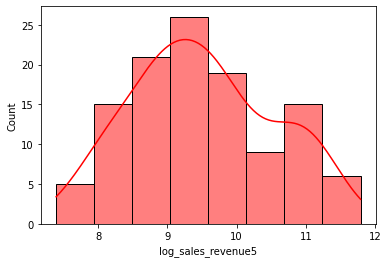

In [22]:
sns.histplot(x = data['log_sales_revenue5'],
             kde=True,
                color = 'r')

In [23]:
''' Biggest profit margin is product 3, followed up by 5. The least profit margin is the 4th '''

#Calculating the average profit margin

profit1 = data.loc[:,'grmar1'].mean()
profit2 = data.loc[:,'grmar2'].mean()
profit3 = data.loc[:,'grmar3'].mean()
profit4 = data.loc[:,'grmar4'].mean()
profit5 = data.loc[:,'grmar5'].mean()
abc=[profit1,profit2,profit3,profit4,profit5]


abc

# margin_compare=data.loc[:,['grmar1','grmar2','grmar3','grmar4','grmar5']]
# sns.histplot(x = abc,
#                 color = 'g')

[0.2793290298224138,
 0.2855766088577586,
 0.2945649348396551,
 0.2533753985586206,
 0.2929078949439656]

{'bodies': [<matplotlib.collections.PolyCollection at 0x7feda7288190>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7feda7213fa0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7feda7288610>,
 'cbars': <matplotlib.collections.LineCollection at 0x7feda7288910>}

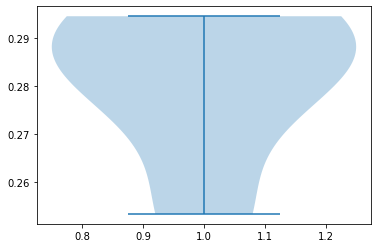

In [24]:
plt.violinplot(abc)

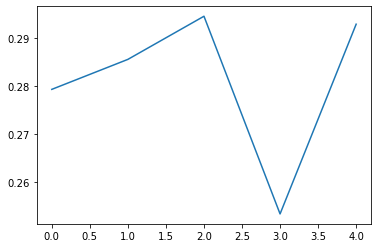

In [25]:
plt.plot(abc)

In [26]:
# For loop for disp
for index,value in data.iterrows():
    if data.loc[index,'disp1'] <= 0.5:
        data.loc[index,'disp1']= 0
    else:
        data.loc[index,'disp1']= 1
        

for index,value in data.iterrows():
    if data.loc[index,'disp2'] <= 0.5:
        data.loc[index,'disp2']= 0
    else:
        data.loc[index,'disp2']= 1

        
for index,value in data.iterrows():
    if data.loc[index,'disp3'] <= 0.5:
        data.loc[index,'disp3']= 0
    else:
        data.loc[index,'disp3']= 1
        

for index,value in data.iterrows():
    if data.loc[index,'disp4'] <= 0.5:
        data.loc[index,'disp4']= 0
    else:
        data.loc[index,'disp4']= 1
        

for index,value in data.iterrows():
    if data.loc[index,'disp5'] <= 0.5:
        data.loc[index,'disp5']= 0
    else:
        data.loc[index,'disp5']= 1
        
        
# For loop for feat
for index,value in data.iterrows():
    if data.loc[index,'feat1'] <= 0.5:
        data.loc[index,'feat1']= 0
    else:
        data.loc[index,'feat1']= 1
        
    
for index,value in data.iterrows():
    if data.loc[index,'feat2'] <= 0.5:
        data.loc[index,'feat2']= 0
    else:
        data.loc[index,'feat2']= 1
        
    
for index,value in data.iterrows():
    if data.loc[index,'feat3'] <= 0.5:
        data.loc[index,'feat3']= 0
    else:
        data.loc[index,'feat3']= 1
        
        
for index,value in data.iterrows():
    if data.loc[index,'feat4'] <= 0.5:
        data.loc[index,'feat4']= 0
    else:
        data.loc[index,'feat4']= 1
        
        
for index,value in data.iterrows():
    if data.loc[index,'feat5'] <= 0.5:
        data.loc[index,'feat5']= 0
    else:
        data.loc[index,'feat5']= 1

In [27]:
# Change data types
data.disp1 = data.disp1.astype(int)
data.disp2 = data.disp2.astype(int)
data.disp3 = data.disp3.astype(int)
data.disp4 = data.disp4.astype(int)
data.feat1 = data.feat1.astype(int)
data.feat2 = data.feat2.astype(int)
data.feat3 = data.feat3.astype(int)
data.feat4 = data.feat4.astype(int)

In [28]:
data.iloc[:,11:21].describe()

,disp1,disp2,disp3,disp4,disp5,feat1,feat2,feat3,feat4,feat5
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,0.431034,0.250000,0.405172,0.491379,0.491379,0.172414,0.129310,0.327586,0.267241,0.250000
std,0.497369,0.434891,0.493055,0.502095,0.502095,0.379378,0.336999,0.471369,0.444439,0.434891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.250000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
data['week'].value_counts()

160    1
87     1
75     1
76     1
77     1
      ..
126    1
127    1
128    1
129    1
40     1
Name: week, Length: 116, dtype: int64

In [30]:
# Quantity Demanded as a function of price

'''
Sales (units sold) = (GRMAR*Price)*64
Variables for regression: Disp and Feat
'''



# Starting here is for product 1


avg_sales1 = data['sales1'].mean()
sigma_sales1 = data['sales1'].std()
avg_grmar1 = data['grmar1'].mean()
sigma_grmar1 = data['grmar1'].std()
avg_price1 = data['price1'].mean()
sigma_price1 = data['price1'].std()


In [31]:
# Starting here is for product 2


avg_sales2 = data['sales2'].mean()
sigma_sales2 = data['sales2'].std()
avg_grmar2 = data['grmar2'].mean()
sigma_grmar2 = data['grmar2'].std()
avg_price2 = data['price2'].mean()
sigma_price2 = data['price2'].std()

In [32]:
# Starting here is for product 3


avg_sales3 = data['sales3'].mean()
sigma_sales3 = data['sales3'].std()
avg_grmar3 = data['grmar3'].mean()
sigma_grmar3 = data['grmar3'].std()
avg_price3 = data['price3'].mean()
sigma_price3 = data['price3'].std()

In [33]:
# Starting here is for product 4


avg_sales4 = data['sales4'].mean()
sigma_sales4 = data['sales4'].std()
avg_grmar4 = data['grmar4'].mean()
sigma_grmar4 = data['grmar4'].std()
avg_price4 = data['price4'].mean()
sigma_price4 = data['price4'].std()

In [34]:
# Starting here is for product 5


avg_sales5 = data['sales5'].mean()
sigma_sales5 = data['sales5'].std()
avg_grmar5 = data['grmar5'].mean()
sigma_grmar5 = data['grmar5'].std()
avg_price5 = data['price5'].mean()
sigma_price5 = data['price5'].std()

In [35]:
#fix the random seed
np.random.seed(42) 

#set the number of simulations
number_sims = 10_000

all_stats_1 = []
all_stats_2 = []
all_stats_3 = []
all_stats_4 = []
all_stats_5 = []

In [36]:
# Product 1
#Beginning simulation loop
for i in range(number_sims):
    grmar1_current     = np.random.normal(avg_grmar1, sigma_grmar1)
    price1_current     = np.random.normal(avg_price1, sigma_price1)
    sales_current1 = grmar1_current*price1_current*64
    
    all_stats_1.append([grmar1_current, price1_current, sales_current1])

In [37]:
# Product 2
# Beginning simulation loop
for i in range(number_sims):
    grmar2_current     = np.random.normal(avg_grmar2, sigma_grmar2)
    price2_current     = np.random.normal(avg_price2, sigma_price2)
    sales_current2 = grmar2_current*price2_current*96 
    
    all_stats_2.append([grmar2_current, price2_current, sales_current2])

In [38]:
# Product 3
# Beginning simulation loop
for i in range(number_sims):
    grmar3_current     = np.random.normal(avg_grmar3, sigma_grmar3)
    price3_current     = np.random.normal(avg_price3, sigma_price3)
    sales_current3 = grmar3_current*price3_current* 64
    
    all_stats_3.append([grmar3_current, price3_current, sales_current3])

In [39]:
# Product 4
# Beginning simulation loop
for i in range(number_sims):
    grmar4_current     = np.random.normal(avg_grmar4, sigma_grmar4)
    price4_current     = np.random.normal(avg_price4, sigma_price4)
    sales_current4 = grmar4_current*price4_current* 64
    
    all_stats_4.append([grmar4_current, price4_current, sales_current4])

In [40]:
# Product 5
# Beginning simulation loop
for i in range(number_sims):
    grmar5_current     = np.random.normal(avg_grmar5, sigma_grmar5)
    price5_current     = np.random.normal(avg_price5, sigma_price5)
    sales_current5 = grmar5_current*price5_current* 64
    
    all_stats_5.append([grmar5_current, price5_current, sales_current5])

In [41]:
# Product 1
#adding to a dataframe
results_df_1 = pd.DataFrame.from_records(all_stats_1, columns = ['GRMAR', 'PRICE', 'PROFIT PER UNIT'])

#printing results
results_df_1

,GRMAR,PRICE,PROFIT PER UNIT
0,0.340257,0.044121,0.960797
1,0.358776,0.058546,1.344316
2,0.250607,0.043288,0.694296
3,0.473040,0.051985,1.573827
4,0.221742,0.050033,0.710035
...,...,...,...
9995,0.430556,0.041252,1.136723
9996,0.388357,0.053158,1.321229
9997,0.396177,0.048689,1.234523
9998,0.448281,0.048607,1.394525


In [42]:
# Product 2
#adding to a dataframe
results_df_2 = pd.DataFrame.from_records(all_stats_2, columns = ['GRMAR', 'PRICE', 'PROFIT PER UNIT'])

#printing results
results_df_2

,GRMAR,PRICE,PROFIT PER UNIT
0,0.307411,0.051661,1.524578
1,0.226866,0.053362,1.162184
2,0.192163,0.046276,0.853677
3,0.160254,0.058986,0.907457
4,0.271061,0.062480,1.625832
...,...,...,...
9995,0.400253,0.055740,2.141756
9996,0.295514,0.046600,1.322021
9997,0.224338,0.056464,1.216044
9998,0.302192,0.053574,1.554212


In [43]:
# Product 3
#adding to a dataframe
results_df_3 = pd.DataFrame.from_records(all_stats_3, columns = ['GRMAR', 'PRICE', 'PROFIT PER UNIT'])

#printing results
results_df_3

,GRMAR,PRICE,PROFIT PER UNIT
0,0.240818,0.042347,0.652673
1,0.271990,0.036536,0.636001
2,0.376279,0.035594,0.857169
3,0.087503,0.042523,0.238137
4,0.437508,0.024426,0.683945
...,...,...,...
9995,0.284913,0.033402,0.609076
9996,0.201672,0.031447,0.405890
9997,0.355361,0.031543,0.717376
9998,0.169378,0.036854,0.399507


In [44]:
# Product 4
#adding to a dataframe
results_df_4 = pd.DataFrame.from_records(all_stats_4, columns = ['GRMAR', 'PRICE', 'PROFIT PER UNIT'])

#printing results
results_df_4

,GRMAR,PRICE,PROFIT PER UNIT
0,0.262056,0.038875,0.651993
1,0.290933,0.027643,0.514713
2,0.232871,0.039423,0.587554
3,0.299405,0.030670,0.587695
4,0.299170,0.041022,0.785452
...,...,...,...
9995,0.291894,0.028455,0.531583
9996,0.095434,0.038877,0.237454
9997,0.347555,0.041181,0.916011
9998,0.206104,0.032579,0.429740


In [45]:
# Product 5
#adding to a dataframe
results_df_5 = pd.DataFrame.from_records(all_stats_5, columns = ['GRMAR', 'PRICE', 'PROFIT PER UNIT'])

#printing results
results_df_5

,GRMAR,PRICE,PROFIT PER UNIT
0,0.387002,0.025111,0.621941
1,0.283472,0.025791,0.467905
2,0.365753,0.028392,0.664604
3,0.563049,0.024614,0.886985
4,0.546970,0.016569,0.580012
...,...,...,...
9995,0.384156,0.031434,0.772836
9996,0.262672,0.027987,0.470482
9997,0.479314,0.025510,0.782549
9998,0.212166,0.029085,0.394939


<AxesSubplot:title={'center':'PROFIT PER UNIT'}, ylabel='Frequency'>

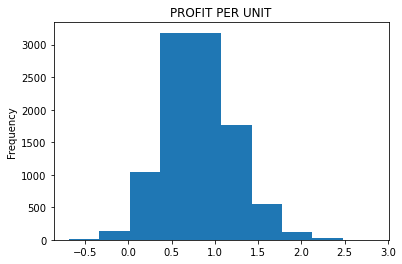

In [46]:
# Product 1
# Plotting a histogram for profits

results_df_1['PROFIT PER UNIT'].plot(kind = "hist", title = 'PROFIT PER UNIT')




<AxesSubplot:title={'center':'PRICE/OZ'}, ylabel='Frequency'>

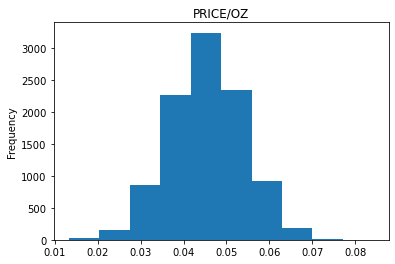

In [47]:
# Product 1
# Plotting a histogram for independent price

results_df_1['PRICE'].plot(kind = "hist", title = 'PRICE/OZ')





<AxesSubplot:title={'center':'PROFIT PER UNIT'}, ylabel='Frequency'>

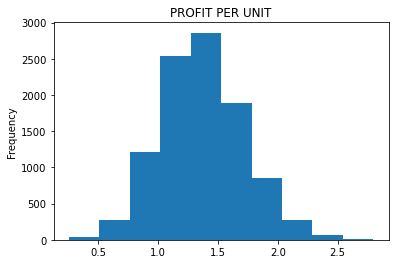

In [48]:
# Product 2
# Plotting a histogram for profits

results_df_2['PROFIT PER UNIT'].plot(kind = "hist", title = 'PROFIT PER UNIT')

<AxesSubplot:title={'center':'PRICE/OZ'}, ylabel='Frequency'>

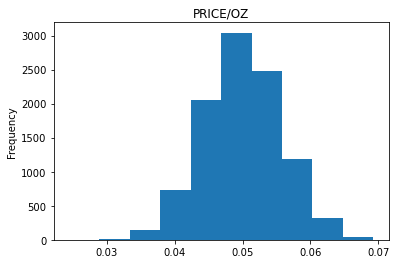

In [49]:
# Product 2
# Plotting a histogram for independent price

results_df_2['PRICE'].plot(kind = "hist", title = 'PRICE/OZ')



<AxesSubplot:title={'center':'PROFIT PER UNIT'}, ylabel='Frequency'>

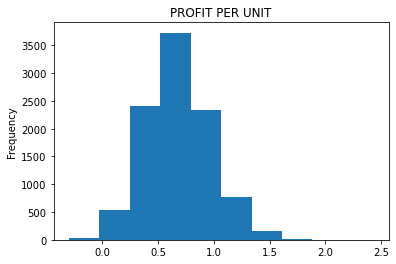

In [50]:
# Product 3
# Plotting a histogram for profits

results_df_3['PROFIT PER UNIT'].plot(kind = "hist", title = 'PROFIT PER UNIT')

<AxesSubplot:title={'center':'PRICE/OZ'}, ylabel='Frequency'>

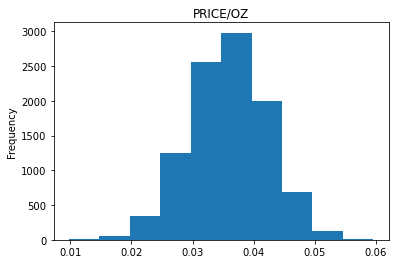

In [51]:
# Product 3
# Plotting a histogram for independent price

results_df_3['PRICE'].plot(kind = "hist", title = 'PRICE/OZ')



<AxesSubplot:title={'center':'PROFIT PER UNIT'}, ylabel='Frequency'>

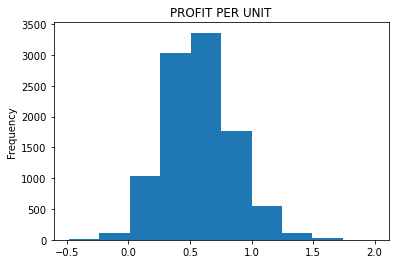

In [52]:
# Product 4
# Plotting a histogram for profits

results_df_4['PROFIT PER UNIT'].plot(kind = "hist", title = 'PROFIT PER UNIT')

<AxesSubplot:title={'center':'PRICE/OZ'}, ylabel='Frequency'>

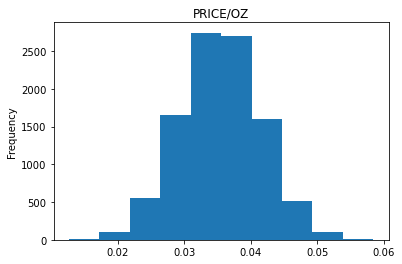

In [53]:
# Product 4
# Plotting a histogram for independent price

results_df_4['PRICE'].plot(kind = "hist", title = 'PRICE/OZ')



<AxesSubplot:title={'center':'PROFIT PER UNIT'}, ylabel='Frequency'>

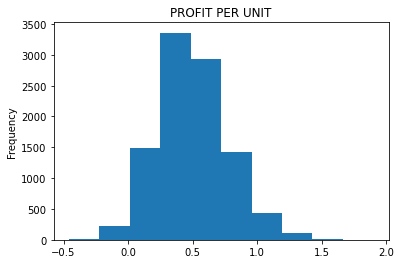

In [54]:
# Product 5
# Plotting a histogram for profits

results_df_5['PROFIT PER UNIT'].plot(kind = "hist", title = 'PROFIT PER UNIT')

<AxesSubplot:title={'center':'PRICE/OZ'}, ylabel='Frequency'>

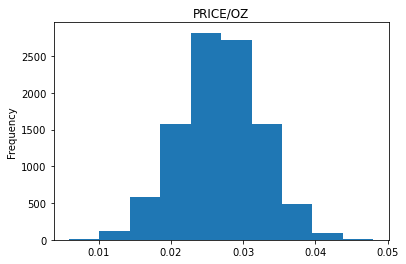

In [55]:
# Product 5
# Plotting a histogram for independent price

results_df_5['PRICE'].plot(kind = "hist", title = 'PRICE/OZ')



In [56]:
# Product 1
#describing the information

print(results_df_1.describe().round(3))

           GRMAR      PRICE  PROFIT PER UNIT
count  10000.000  10000.000        10000.000
mean       0.280      0.045            0.812
std        0.124      0.009            0.398
min       -0.202      0.013           -0.686
25%        0.197      0.040            0.536
50%        0.280      0.045            0.786
75%        0.364      0.051            1.068
max        0.694      0.084            2.833


In [57]:
# Product 2
#describing the information

print(results_df_2.describe().round(3))

           GRMAR      PRICE  PROFIT PER UNIT
count  10000.000  10000.000        10000.000
mean       0.285      0.050            1.368
std        0.063      0.006            0.344
min        0.056      0.024            0.256
25%        0.242      0.046            1.130
50%        0.286      0.050            1.352
75%        0.328      0.054            1.587
max        0.519      0.069            2.797


In [58]:
# Product 3
#describing the information

print(results_df_3.describe().round(3))

           GRMAR      PRICE  PROFIT PER UNIT
count  10000.000  10000.000        10000.000
mean       0.297      0.036            0.681
std        0.114      0.006            0.289
min       -0.195      0.010           -0.298
25%        0.221      0.032            0.484
50%        0.296      0.036            0.667
75%        0.374      0.040            0.859
max        0.697      0.060            2.429


In [59]:
# Product 4
#describing the information

print(results_df_4.describe().round(3))

           GRMAR      PRICE  PROFIT PER UNIT
count  10000.000  10000.000        10000.000
mean       0.254      0.035            0.576
std        0.111      0.006            0.276
min       -0.238      0.013           -0.482
25%        0.179      0.031            0.388
50%        0.255      0.035            0.559
75%        0.328      0.040            0.749
max        0.650      0.058            1.988


In [60]:
# Product 5
#describing the information

print(results_df_5.describe().round(3))

           GRMAR      PRICE  PROFIT PER UNIT
count  10000.000  10000.000        10000.000
mean       0.293      0.027            0.502
std        0.143      0.006            0.272
min       -0.230      0.006           -0.458
25%        0.197      0.023            0.314
50%        0.291      0.027            0.479
75%        0.389      0.030            0.667
max        0.836      0.048            1.900


In [61]:
#So far we have simulated 10 000 scenarios that have estimated the optimal profit and the optimal 
#price per ounce. This simulations do not take into consideration other products' effect and therefore
#we will do more analysis

In [62]:
# Product 1
# Compute fraction where losses occur
print('Fraction Losses =',(results_df_1['PROFIT PER UNIT'] < 0).sum()/number_sims)

Fraction Losses = 0.013


In [63]:
# Product 2
# Compute fraction where losses occur
print('Fraction Losses =',(results_df_2['PROFIT PER UNIT'] < 0).sum()/number_sims)

Fraction Losses = 0.0


In [64]:
# Product 3
# Compute fraction where losses occur
print('Fraction Losses =',(results_df_3['PROFIT PER UNIT'] < 0).sum()/number_sims)

Fraction Losses = 0.0054


In [65]:
# Product 4
# Compute fraction where losses occur
print('Fraction Losses =',(results_df_4['PROFIT PER UNIT'] < 0).sum()/number_sims)

Fraction Losses = 0.0108


In [66]:
# Product 5
# Compute fraction where losses occur
print('Fraction Losses =',(results_df_5['PROFIT PER UNIT'] < 0).sum()/number_sims)

Fraction Losses = 0.0198


In [67]:
#Product 1
# Step 1: build a model

# 'week','sales1','price1','disp1','feat1','grmar1'

lm_best = smf.ols(formula =  """log_sales1~  log_price1+ feat1 
                                            """,
                                data = data)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_sales1   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     194.6
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           2.52e-37
Time:                        17:29:25   Log-Likelihood:                -44.706
No. Observations:                 116   AIC:                             95.41
Df Residuals:                     113   BIC:                             103.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4836      0.545      2.721      0.0

In [68]:
# Product 2
# Step 1: build a model
lm_best = smf.ols(formula =  """log_sales2~ log_price2 + feat2 
                                            """,
                                data = data)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_sales2   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     60.08
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.69e-18
Time:                        17:29:25   Log-Likelihood:                 5.9225
No. Observations:                 116   AIC:                            -5.845
Df Residuals:                     113   BIC:                             2.416
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9627      0.599      8.288      0.0

In [69]:
# Product 3
# Step 1: build a model
lm_best = smf.ols(formula =  """log_sales3~ log_price3 + feat3 
                                            """,
                                data = data)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_sales3   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     89.41
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           5.24e-24
Time:                        17:29:26   Log-Likelihood:                -144.12
No. Observations:                 116   AIC:                             294.2
Df Residuals:                     113   BIC:                             302.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0843      1.504     -3.380      0.0

In [70]:
# Product 4
# Step 1: build a model
lm_best = smf.ols(formula =  """log_sales4~ log_price4  + feat4  
                                            """,
                                data = data)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_sales4   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     133.7
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           1.65e-30
Time:                        17:29:26   Log-Likelihood:                -85.036
No. Observations:                 116   AIC:                             176.1
Df Residuals:                     113   BIC:                             184.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0327      0.990      1.043      0.2

In [71]:
# Product 5
# Step 1: build a model
lm_best = smf.ols(formula =  """log_sales5~ log_price5 + feat5  + disp5 
                                            """,
                                data = data)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_sales5   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     55.56
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           4.47e-22
Time:                        17:29:26   Log-Likelihood:                -129.10
No. Observations:                 116   AIC:                             266.2
Df Residuals:                     112   BIC:                             277.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1039      1.285     -2.415      0.0

In [72]:
#this is to get the predictions from the regression for product 5
estimates_wlog=results.predict()
estimates_wlog_avg=estimates_wlog.mean()
estimates_wlog_avg

8.994756413737761

In [73]:
# This is the estimate to put in monte carlo. for product 5

estimates_avg= np.exp(estimates_wlog_avg)
estimates_avg

8060.705911501714

In [74]:
#SO Far we  are  still looking at individual products and how they are
#affected by their variables. Now we will focus on product 5 and the influence it gets 
#from other products

In [75]:
#Regression Complete 2
# Step 1: build a model


#log_sales5~  disp1 + disp2 + disp3 +
                                #disp4 + disp5 + feat1 + feat2 + feat3 + 
                                #feat4 + feat5 + log_sales1 + 
                                #log_sales2 + log_sales3 + log_sales4 +
                                #log_price1 + log_price2 + 
                                #log_price3 + log_price4 + log_price5 + 
                                #log_grmar1 + log_grmar2 + log_grmar3 +
                                #log_grmar4 + log_grmar5


lm_best = smf.ols(formula =  """log_sales5~    
                                feat2 +  
                                feat4 + 
                                feat5 + 
                                log_sales2 +
                                log_sales3 + 
                                log_sales4 +
                                log_price5  
                                """,
                                data = data)


# Step 2: fit the model based on the data
results2 = lm_best.fit()



# Step 3: analyze the summary output
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:             log_sales5   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     34.69
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           6.68e-25
Time:                        17:29:26   Log-Likelihood:                -113.64
No. Observations:                 116   AIC:                             243.3
Df Residuals:                     108   BIC:                             265.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1074      2.327     -2.624      0.0

Insights from the regression:
    - Feat in weekly brochure in product 2 will lower Dominick OJ sales
    - Display bonus. tags for product 2 will increase sales 5
    - Feat in brochure for Dominick OJ  will increase its sales
     - increase of sales on Direct competition which is 4 and 3 will decrease sales.
     - increase in sales of product 2 will drive up sales in product 5.
    

In [76]:
#this is to get the predictions from the regression for product 5
estimates_wlog2=results2.predict()
estimates_wlog_avg2=estimates_wlog2.mean()
estimates_wlog_avg2

8.994756413737793

In [77]:
estimates_without_log = np.exp(estimates_wlog2)

In [78]:
# This is the estimate to put in monte carlo. for product 5

estimates_avg2= round(np.exp(estimates_wlog_avg2),2)
estimates_avg2

8060.71

In [79]:
final_STD = round(estimates_without_log.std(),2)
final_STD

14516.07

In [80]:
mean_with_log = results2.predict().mean()
final_STD_with_log =  results2.predict().std()
price_mean = np.exp(-2.8986)
price_std = np.exp(0.331)
grmar_mean= data.loc[:,'grmar5'].mean()
grmar_std= data.loc[:,'grmar5'].std()

In [81]:
#fix the random seed
np.random.seed(42) 
number_sims2=10000


In [82]:
final_result = [] # Save results from each sim here


for i in range(number_sims):
    sales_current = np.random.normal(estimates_avg2, final_STD)
    price_current= np.random.normal(price_mean,price_std)
    grmar_current = np.random.normal(grmar_mean,grmar_std)
    
    profits_current= sales_current* 64 * price_current * grmar_current
    
    final_result.append([sales_current, price_current, grmar_current,profits_current])
    
    
    
# Save results in the results dataframe
results_df_FINAL = pd.DataFrame.from_records(final_result, columns=['Sales(Quantity)', 'Price', 'GRMAR','Profits'])



# Describe the results
print(results_df_FINAL.describe())

       Sales(Quantity)         Price         GRMAR       Profits
count     10000.000000  10000.000000  10000.000000  1.000000e+04
mean       7977.869627      0.058815      0.293188  7.522353e+03
std       14570.860471      1.391449      0.140706  4.769594e+05
min      -47918.704226     -5.286905     -0.262928 -6.368376e+06
25%       -1950.146212     -0.897475      0.199335 -1.307814e+05
50%        7982.744856      0.059944      0.294014  1.490946e+03
75%       17850.378056      1.007802      0.387499  1.468039e+05
max       73079.410524      5.195170      0.851568  3.937614e+06


In [83]:
data['sales5'].mean()


15358.896551724138

In [84]:
profit=data['price5']*64*data['grmar5']
7935*profit.mean()

4278.169095166881

In [85]:
data.loc[:,['week','sales5']]

,week,sales5
0,40,2432
1,43,2112
2,44,896
3,45,1152
4,46,3072
...,...,...
111,156,2944
112,157,1536
113,158,4416
114,159,46080


In [ ]:
defg= data['price3']*64
defg.mean()

In [ ]:
defz=data['price4']*64
defz.mean()

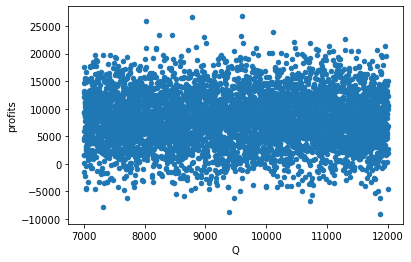

In [87]:
# Q_stats = [] # store Q stats here

# for Q in range(7000, 12000):

#     final_result = [] # Save results from each sim here


#     for i in range(number_sims2):
#         sales_current = np.random.normal(estimates_avg2, final_STD)
#         price_current= np.random.normal(price_mean,price_std)
#         grmar_current = np.random.normal(grmar_mean,grmar_std)

#         profits_current= sales_current* 64 * price_current * grmar_current

#         final_result.append([sales_current, price_current, grmar_current,profits_current])



#     # Save results in the results dataframe
#     results_df_FINAL = pd.DataFrame.from_records(final_result, columns=['sales', 'Price', 'GRMAR','profits'])

#     Q_stats.append([Q, results_df_FINAL['profits'].mean()])

                                                 
# Q_results_df = pd.DataFrame.from_records(Q_stats, columns=['Q', \
#                                'profits'])
    
# Q_results_df.plot.scatter(x="Q", y="profits");

In [88]:
#
#Homework approach

#Transforming log

data['log_sales5']= np.log(data['sales5'])
data['log_price1']= np.log(data['price1'])
data['log_price2']= np.log(data['price2'])
data['log_price3']= np.log(data['price3'])
data['log_price4']= np.log(data['price4'])
data['log_price5']= np.log(data['price5'])
fixed_grmar5 = data.loc[:,'grmar5'].mean()
fixed_price1 = data.loc[:,'price1'].mean()
fixed_price2 = data.loc[:,'price2'].mean()
fixed_price3 = data.loc[:,'price3'].mean()
fixed_price4 = data.loc[:,'price4'].mean()
fixed_price5 = data.loc[:,'price5'].mean()
log_fixed_price1= np.log(fixed_price1)
log_fixed_price2= np.log(fixed_price2)
log_fixed_price3= np.log(fixed_price3)
log_fixed_price4= np.log(fixed_price4)
log_fixed_price5= np.log(fixed_price5)

In [89]:
# Product 5
# Step 1: build a model
lm_best = smf.ols(formula =  """log_sales5~ log_price2
                        + log_price3+ log_price4+ log_price5 + feat5 
                        + disp5 
                                            """,
                                data = data)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             log_sales5   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     36.39
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           6.66e-24
Time:                        17:36:40   Log-Likelihood:                -118.19
No. Observations:                 116   AIC:                             250.4
Df Residuals:                     109   BIC:                             269.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6726      2.141     -0.314      0.7

In [90]:
# Intercept, lprice1, lprice2,...lprice4
b0 = -0.6726 
b2 = -1.6261
b3=1.0544 
b4=1.1239 
b6=0.6610
b7=0.2854

#draw for b5
b5_mean= -3.2319
b5_sigma= 0.349

min_price=min(data['log_price5'])
max_price=max(data['log_price5'])
min_grmar5=min(data['log_grmar5'])
max_grmar5=max(data['log_grmar5'])

In [94]:
print(min_price)
print(max_grmar5)

-4.1689334192131735
-0.6226887169113839


In [91]:
#fix the random seed
np.random.seed(42) 

#set the number of simulations
number_sims = 10_000

all_stats = []
for i in range(number_sims):
    price5_curr = np.random.uniform(min_price,max_price)
    b5_current = np.random.normal(b5_mean, b5_sigma)
    sales5_current = b0  + b2*(log_fixed_price2) + b3*(log_fixed_price3) + \
        b4*(log_fixed_price4) + b5_current*(price5_curr) + b6 + b7
    profits_current = np.exp(sales5_current) * 64 * fixed_grmar5 * np.exp(price5_curr)
    all_stats.append([np.exp(price5_curr),np.exp(sales5_current), profits_current])

# Save results in the results dataframe
results_df = pd.DataFrame.from_records(all_stats, columns=['price/oz','sales', 'profits'])


results_df.describe()



,price/oz,sales,profits
count,10000.000000,1.000000e+04,1.000000e+04
mean,0.025358,7.562383e+04,2.816111e+04
std,0.006713,3.365229e+05,1.078724e+05
min,0.015469,1.559165e+02,9.398134e+01
25%,0.019403,6.467769e+03,3.282157e+03
50%,0.024488,1.873289e+04,8.648230e+03
75%,0.030827,5.617890e+04,2.347747e+04
max,0.038902,2.311886e+07,7.174615e+06


In [92]:
# Grmar 5
# Step 1: build a model
lm_best = smf.ols(formula =  """grmar5~ price5     """,
                                data = data)


# Step 2: fit the model based on the data
results_grmar5 = lm_best.fit()



# Step 3: analyze the summary output
print(results_grmar5.summary())

                            OLS Regression Results                            
Dep. Variable:                 grmar5   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     132.4
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           8.42e-21
Time:                        17:37:18   Log-Likelihood:                 107.27
No. Observations:                 116   AIC:                            -210.5
Df Residuals:                     114   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2007      0.044     -4.579      0.0

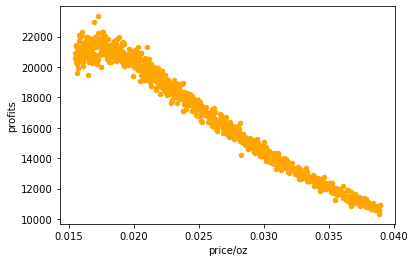

In [104]:
#fix the random seed
np.random.seed(42) 

#set the number of simulations
number_sims = 10000

price5_stats = []  # Save results from each sim here

#Profit Formula: 
# Profits = Sales * 64 onz * Price * GRMAR
# should there be a loop that goes over each week?



for price5_curr in np.arange(min_price,max_price,0.001):

    all_stats = []
    for i in range(number_sims):
        grmar5_current= np.exp(price5_curr)*18.4315-0.2007
        b5_current = np.random.normal(b5_mean, b5_sigma)
        sales5_current = b0 + b2*(log_fixed_price2) + b3*(log_fixed_price3) + \
            b4*(log_fixed_price4) + b5_current*(price5_curr) + b6 + b7
        profits_current = np.exp(sales5_current) * 64 * grmar5_current * np.exp(price5_curr)
        all_stats.append([np.exp(price5_curr),np.exp(sales5_current), profits_current,grmar_current])
    
    # Save results in the results dataframe
    results_df = pd.DataFrame.from_records(all_stats, columns=['price/oz','sales', 'profits','grmar'])

    price5_stats.append([np.exp(price5_curr), results_df['profits'].mean(),results_df['sales'].mean(),results_df['grmar'].mean()])

price5_results_df = pd.DataFrame.from_records(price5_stats, columns=['price/oz','profits','sales','GRMAR'])
    

price5_results_df.plot.scatter(x="price/oz", y="profits",color='orange');

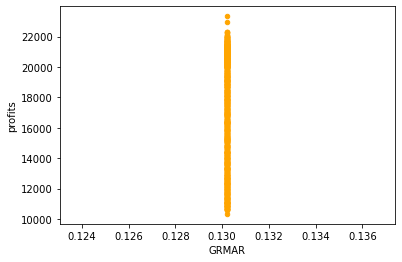

In [107]:
price5_results_df.plot.scatter(x="GRMAR", y="profits",color='orange');

In [106]:
price5_results_df.describe()

,price/oz,profits,sales,GRMAR
count,923.000000,923.000000,923.000000,9.230000e+02
mean,0.025408,17075.854104,69871.044167,1.302314e-01
std,0.006726,3522.405964,63649.696449,1.083054e-15
min,0.015469,10335.747564,8063.784907,1.302314e-01
25%,0.019479,13913.174885,19192.491380,1.302314e-01
50%,0.024528,17539.878047,44328.321804,1.302314e-01
75%,0.030887,20468.060957,104613.537996,1.302314e-01
max,0.038893,23343.389439,252684.036023,1.302314e-01


<AxesSubplot:title={'center':'Profits distribution'}, ylabel='Frequency'>

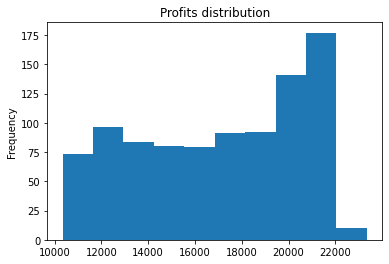

In [101]:
price5_results_df['profits'].plot(kind='hist',title='Profits distribution')

<AxesSubplot:xlabel='log_profits', ylabel='Count'>

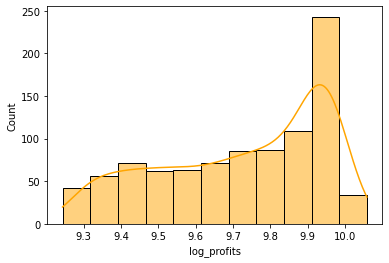

In [102]:
price5_results_df['log_profits']=np.log(price5_results_df.loc[:,'profits'])
# price5_results_df['log_profits'].plot(kind='hist',title='Price distribution')
sns.histplot(x= 'log_profits',data=price5_results_df,kde=True, color = 'orange')

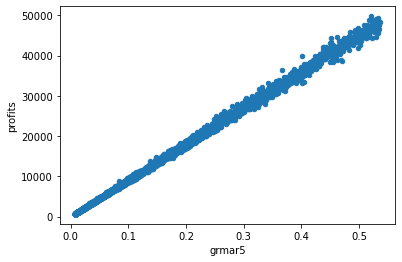

In [79]:
#fix the random seed
np.random.seed(42) 

#set the number of simulations
number_sims = 10000

grmar5_stats = []  # Save results from each sim here

#Profit Formula: 
# Profits = Sales * 64 onz * Price * GRMAR
# should there be a loop that goes over each week?


for grmar5_curr in np.arange(min_grmar5,max_grmar5,0.001):

    all_stats = []
    for i in range(number_sims):
        price5_curr = np.random.uniform(min_price,max_price)
        b5_current = np.random.normal(b5_mean, b5_sigma)
        sales5_current = b0 + b2*(log_fixed_price2) + b3*(log_fixed_price3) + \
            b4*(log_fixed_price4) + b5_current*(price5_curr) + b6 + b7
        profits_current = np.exp(sales5_current) * 64 * np.exp(grmar5_curr) * np.exp(price5_curr)
        all_stats.append([np.exp(grmar5_curr),np.exp(sales5_current), profits_current])
    
    # Save results in the results dataframe
    results_df = pd.DataFrame.from_records(all_stats, columns=['grmar5','sales', 'profits'])

    grmar5_stats.append([np.exp(grmar5_curr), results_df['profits'].mean()])

grmar5_results_df = pd.DataFrame.from_records(grmar5_stats, columns=['grmar5','profits'])
    

grmar5_results_df.plot.scatter(x="grmar5", y="profits");

In [80]:
grmar5_results_df.describe()

,grmar5,profits
count,4244.000000,4244.000000
mean,0.124557,11193.136773
std,0.135536,12187.814216
min,0.007700,650.883921
25%,0.022242,1993.376433
50%,0.064246,5790.057805
75%,0.185577,16672.920304
max,0.536046,49793.758211


<AxesSubplot:title={'center':'GRMAR distribution'}, ylabel='Frequency'>

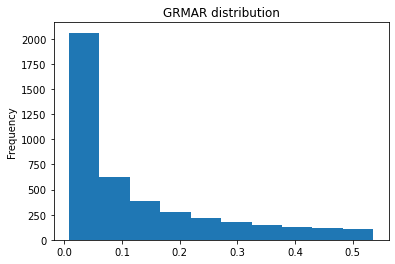

In [81]:
grmar5_results_df['grmar5'].plot(kind='hist',title='GRMAR distribution')

<AxesSubplot:title={'center':'Price distribution'}, ylabel='Frequency'>

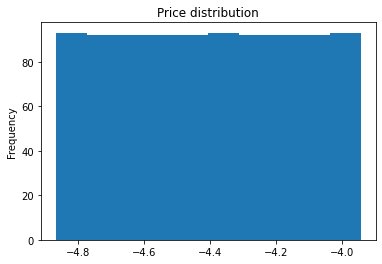

In [83]:
price5_results_df['log_grmar5']=np.log(grmar5_results_df.loc[:,'grmar5'])
price5_results_df['log_grmar5'].plot(kind='hist',title='Price distribution')